In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Step 1**

#### **European Options Using Binomial Tree**

In [ ]:
def call_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return C[0, 0], C, S, Delta, Delta[0,0]


def put_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(K - S_ini * (u ** (i)) * (d ** (N - i)), 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return C[0, 0], C, S, Delta, Delta[0,0]

In [ ]:
def european_option(S_ini, K, T, r, sigma, N, opttype):
  dt = T/N
  u = np.exp(sigma*np.sqrt(dt))
  d = np.exp(-sigma*np.sqrt(dt))
  p = (np.exp(r*dt) - d) / (u - d)
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])
  Delta = np.zeros([N, N])

  for i in range(0, N+1):
    S[N, i] = S_ini * (u**i) * (d**(N-i))
    if opttype == 'C':
      C[N, i] = max(S[N, i] - K, 0)
    else:
      C[N, i] = max(K - S[N, i], 0)

  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      C[j, i] = np.exp(-r*dt) * (C[j+1, i+1]*p + C[j+1, i]*(1-p))
      S[j, i] = S_ini * (u**i) * (d**(j-i))
      #if opttype == 'C':
      #  C[j, i] = max(0, S[j, i] - K)
      #else:
      #  C[j, i] = max(0, K - S[j, i])
      Delta[j,i] = (C[j+1, i+1] - C[j+1, i]) / (S[j+1, i+1] - S[j+1, i])

  return C[0,0], C, S, Delta, Delta[0,0]

In [ ]:
# Assumptions
S0 = 100
r = 0.05
sigma = 0.2
T = 3/12 # months
num_steps = 6
Strike = S0 # ATM
dt = T/num_steps


call_price, call_prices, stock_prices, call_delta, c_search_delta = call_option_delta(S0, Strike, T, r, sigma, num_steps)
put_price, put_prices, stock_prices, put_delta, p_search_delta = put_option_delta(S0, Strike, T, r, sigma, num_steps)

In [ ]:
c_prices = []
p_prices = []
N_steps = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
for s in N_steps:
  call_price, call_prices, call_stock_prices, call_delta, c_search_delta = call_option_delta(S0, Strike, T, r, sigma, s)
  put_price, put_prices, put_stock_prices, put_delta, p_search_delta = put_option_delta(S0, Strike, T, r, sigma, s)
  c_prices.append(call_price)
  p_prices.append(put_price)

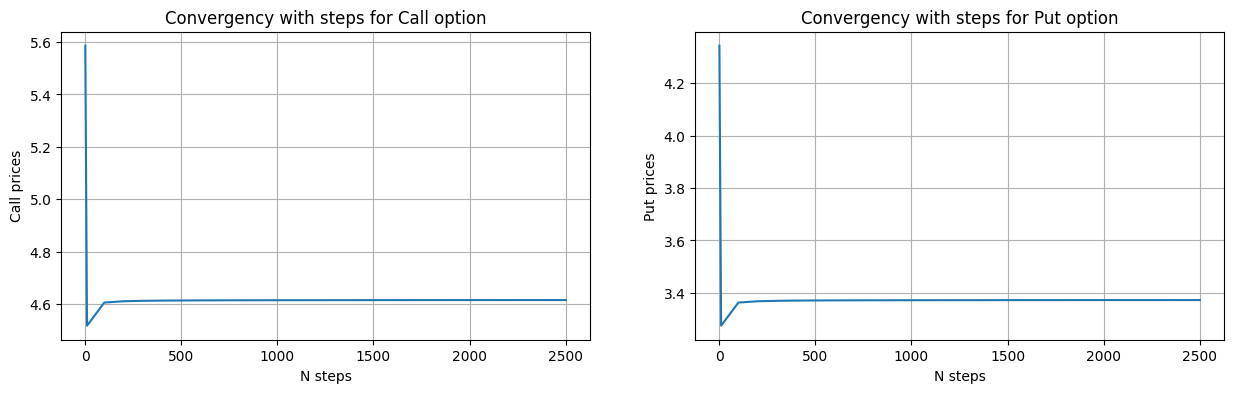

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

axes[0].plot(N_steps, np.array(c_prices))
axes[0].set_title(f"Convergency with steps for Call option")
axes[0].set_ylabel("Call prices")
axes[0].set_xlabel("N steps")
axes[0].grid(True)

axes[1].plot(N_steps, np.array(p_prices))
axes[1].set_title(f"Convergency with steps for Put option")
axes[1].set_ylabel("Put prices")
axes[1].set_xlabel("N steps")
axes[1].grid(True)
plt.show()

In [ ]:
call_price, call_prices, stock_prices, call_delta, c_search_delta = call_option_delta(S0, Strike, T, r, sigma, 500)
put_price, put_prices, stock_prices, put_delta, p_search_delta = put_option_delta(S0, Strike, T, r, sigma, 50)

print(f"Call option price: {round(call_price,2)}")
print(f"Put option price: {round(put_price,2)}")

Call option price: 4.61
Put option price: 3.35


##### *6. Compute the Greek Delta for the European call and European put at time 0:*

In [ ]:
print(f"Call option delta = {np.round(c_search_delta ,2)}")
print(f"Put option delta = {np.round(p_search_delta ,2)}")

print(f"u = {np.round(np.exp(sigma*np.sqrt(dt)),2)}")
print(f"d = {np.round(np.exp(-sigma*np.sqrt(dt)),2)}")

Call option delta = 0.57
Put option delta = -0.43
u = 1.04
d = 0.96


##### *7. Compute the Vega for the European call and European put:*

In [ ]:
def compute_vega_european(sigma1: float, sigma2: float, opttype):
  if opttype == 'C':
    call_price1, call_prices1, stock_prices1, call_delta1, c_search_delta1 = call_option_delta(100, 100, 3/12, 0.05, sigma1, 100)
    call_price2, call_prices2, stock_prices2, call_delta2, c_search_delta2 = call_option_delta(100, 100, 3/12, 0.05, sigma2, 100)
    return np.round((call_price2 - call_price1) / (sigma2 - sigma1)/100,2)
  else:
    put_price1, put_prices1, stock_prices1, put_delta1, p_search_delta1 = put_option_delta(100, 100, 3/12, 0.05, sigma1, 100)
    put_price2, put_prices2, stock_prices2, put_delta2, p_search_delta2 = put_option_delta(100, 100, 3/12, 0.05, sigma2, 100)
    return np.round((put_price2 - put_price1) / (sigma2 - sigma1)/100,2)

In [ ]:
print(f"Call option vega: {compute_vega_european(0.2, 0.25, 'C')}")
print(f"Put option vega: {compute_vega_european(0.2, 0.25, 'P')}")

Call option vega: 0.2
Put option vega: 0.2


In [ ]:
#call = european_option(S0, K, T, r, sigma, 10, 'C')

#### **American Options Using Binomial Tree**

In [ ]:
def american_option(S_ini, K, T, r,sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    Vega = np.zeros([N, N])

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
N_steps_array = [1,10,100,200,300,400,500,600,700,800,900,1000]
call_price=[]
put_price=[]
for N in N_steps_array:
  CP, C, S, d = american_option(100, 100, 1/4, 0.05, 0.2 ,N,"C")
  PP, P, S_1, d_1 = american_option(100,100,1/4,0.05,0.2,N,"P")
  call_price.append(CP)
  put_price.append(PP)

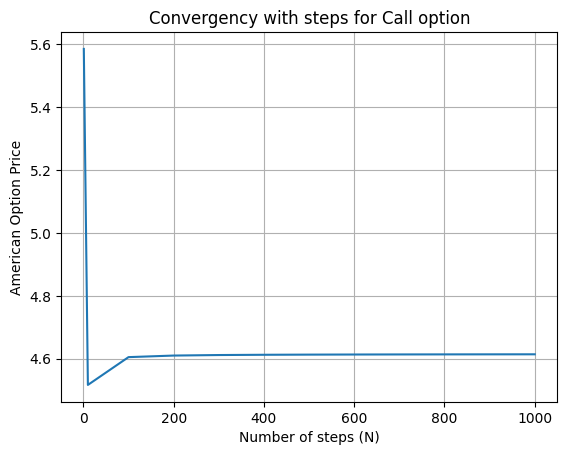

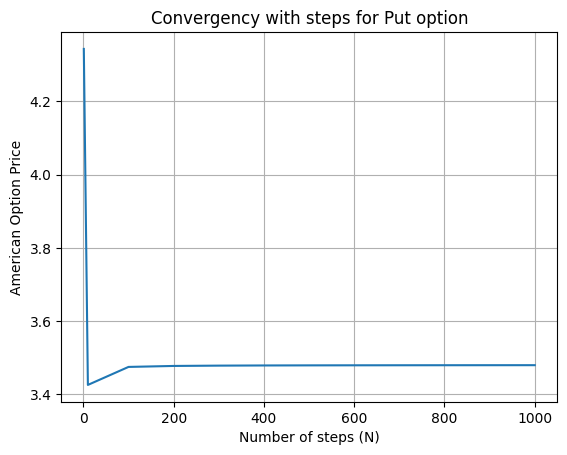

In [ ]:
plt.plot(N_steps_array, np.array(call_price))
plt.title("Convergency with steps for Call option")
plt.xlabel("Number of steps (N)")
plt.ylabel("American Option Price")
plt.grid(True)
plt.show()

plt.plot(N_steps_array, np.array(put_price))
plt.title("Convergency with steps for Put option")
plt.xlabel("Number of steps (N)")
plt.ylabel("American Option Price")
plt.grid(True)
plt.show()

In [ ]:
price_call, cost_call, stock_call, delta_call = american_option(100, 100, 1/4,0.05,0.2,100, "C")
price_put, cost_put, stock_put, delta_put = american_option(100, 100, 1/4,0.05,0.2,100, "P")

In [ ]:
print("Greek delta for American Call: ", np.round(delta_call[0,0], 2))
print("Greek delta for American Put: ",np.round(delta_put[0,0],2))

Greek delta for American Call:  0.57
Greek delta for American Put:  -0.45


In [ ]:
print("American Call Price at 20% volatility: ${:.2f}".format(price_call))
print("American Put Price at 20% volatility: ${:.2f}".format(price_put))

American Call Price at 20% volatility: $4.61
American Put Price at 20% volatility: $3.47


In [ ]:
price_call_vega, cost_call_vega, stock_call_vega, delta_call_vega = american_option(100, 100, 1/4,0.05,0.25,100, "C")
price_put_vega, cost_put_vega, stock_put_vega, delta_put_vega = american_option(100, 100, 1/4,0.05,0.25,100, "P")

In [ ]:
old_volatility = 0.2
new_volatility = 0.25
change = new_volatility-old_volatility
vega_call = (price_call_vega-price_call)/change/100
vega_put = (price_put_vega-price_put)/change/100
print("Vega for American Call option after 5% increase in volatility: {:.2f}".format(vega_call))
print("Vega for American Put option after 5% increase in volatility: {:.2f}".format(vega_put))

Vega for American Call option after 5% increase in volatility: 0.20
Vega for American Put option after 5% increase in volatility: 0.20


#### Graphs and Confirmation

In [ ]:
K = 100
r = 0.05
sigma = 0.2
T = 1/2
N = 100
stock_prices = np.linspace(70, 130, 100)
pv_K = K * np.exp(-r*T) * np.ones(100)

##### *11 The European call and put satisfy put-call parity*

In [ ]:
european_call_option_prices = [european_option(S_ini=S_ini, K=K, T=T, r=r, sigma=sigma, N=N, opttype='C')[0] for S_ini in stock_prices]
european_put_option_prices = [european_option(S_ini=S_ini, K=K, T=T, r=r, sigma=sigma, N=N, opttype='P')[0] for S_ini in stock_prices]

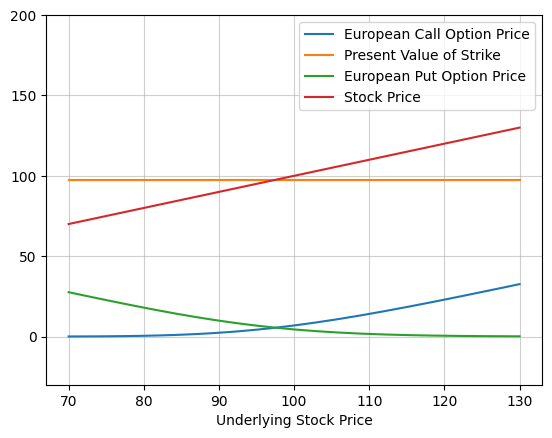

In [ ]:
plt.plot(stock_prices, european_call_option_prices, label='European Call Option Price')
plt.plot(stock_prices, pv_K, label='Present Value of Strike')
plt.plot(stock_prices, european_put_option_prices, label='European Put Option Price')
plt.plot(stock_prices, stock_prices, label='Stock Price')
plt.xlabel('Underlying Stock Price')
plt.legend()
plt.ylim(-30, 200)
plt.grid(alpha=0.6, ls="-")
plt.show()

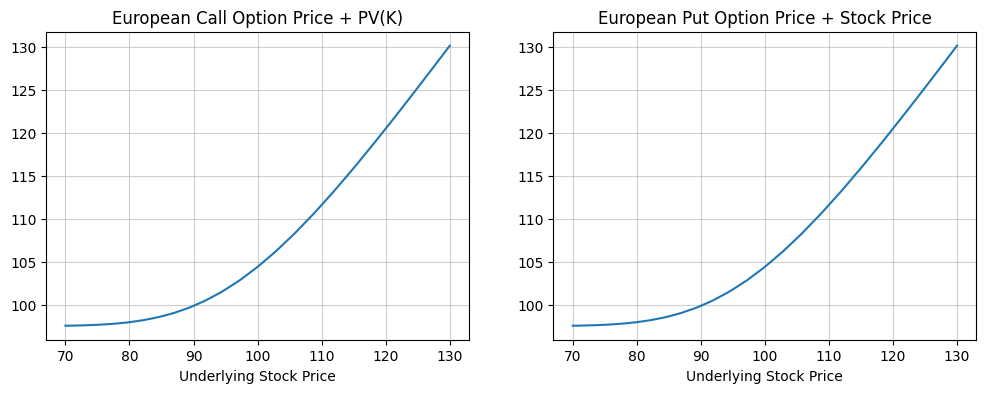

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (12,4))

axes[0].plot(stock_prices, european_call_option_prices+pv_K)
axes[0].set_title('European Call Option Price + PV(K)')
axes[0].set_xlabel('Underlying Stock Price')
axes[0].grid(alpha=0.6, ls="-")

axes[1].plot(stock_prices, european_put_option_prices+stock_prices)
axes[1].set_title('European Put Option Price + Stock Price')
axes[1].set_xlabel('Underlying Stock Price')
axes[1].grid(alpha=0.6, ls="-")

plt.show()

##### *12 The American call and put doesn't satisfy put-call parity*

In [ ]:
american_call_option_prices = [american_option(S_ini=S_ini, K=K, T=T, r=r, sigma=sigma, N=N, opttype='C')[0] for S_ini in stock_prices]
american_put_option_prices = [american_option(S_ini=S_ini, K=K, T=T, r=r, sigma=sigma, N=N, opttype='P')[0] for S_ini in stock_prices]

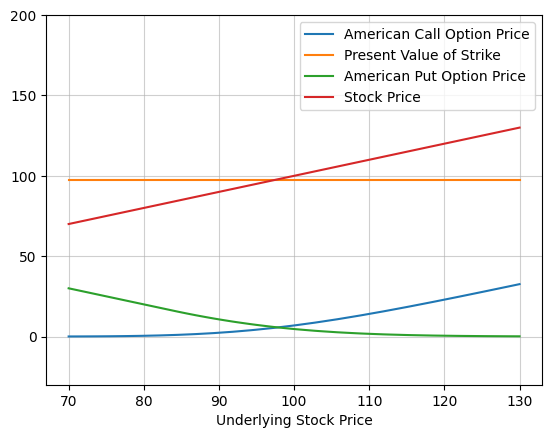

In [ ]:
plt.plot(stock_prices, american_call_option_prices, label='American Call Option Price')
plt.plot(stock_prices, pv_K, label='Present Value of Strike')
plt.plot(stock_prices, american_put_option_prices, label='American Put Option Price')
plt.plot(stock_prices, stock_prices, label='Stock Price')
plt.xlabel('Underlying Stock Price')
plt.legend()
plt.ylim(-30, 200)
plt.grid(alpha=0.6, ls="-")
plt.show()

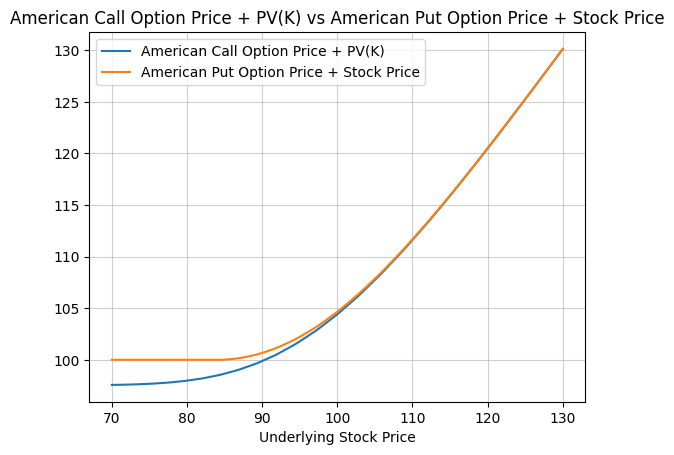

In [ ]:
plt.plot(stock_prices, american_call_option_prices+pv_K, label='American Call Option Price + PV(K)')
plt.plot(stock_prices, american_put_option_prices+stock_prices, label='American Put Option Price + Stock Price')
plt.title('American Call Option Price + PV(K) vs American Put Option Price + Stock Price')
plt.xlabel('Underlying Stock Price')
plt.grid(alpha=0.6, ls="-")
plt.legend()

plt.show()

##### *13 The European call is less than or equal to the American call*

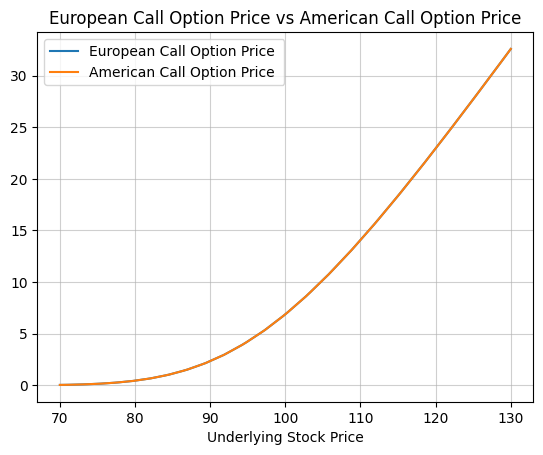

In [ ]:
plt.plot(stock_prices, european_call_option_prices, label='European Call Option Price')
plt.plot(stock_prices, american_call_option_prices, label='American Call Option Price ')
plt.title('European Call Option Price vs American Call Option Price')
plt.xlabel('Underlying Stock Price')
plt.grid(alpha=0.6, ls="-")
plt.legend()

plt.show()

##### *14 The European put is less than or equal to the American put*

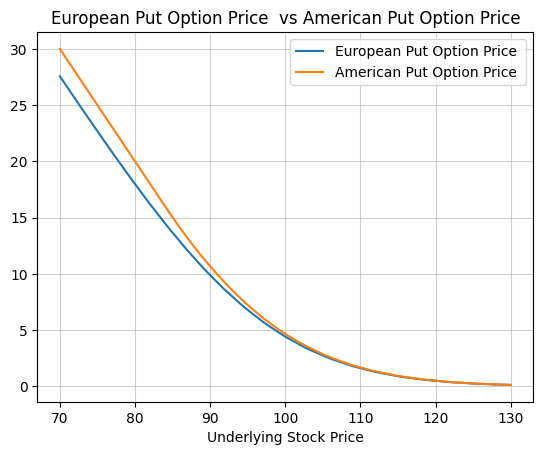

In [ ]:
plt.plot(stock_prices, european_put_option_prices, label='European Put Option Price')
plt.plot(stock_prices, american_put_option_prices, label='American Put Option Price ')
plt.title('European Put Option Price  vs American Put Option Price')
plt.xlabel('Underlying Stock Price')
plt.grid(alpha=0.6, ls="-")
plt.legend()

plt.show()

# **Step 2**

#### **European Options using Trinomial Tree**

In [ ]:
#European Options using Trinomial tree

class EuropeanTrinomialModel(object):
  def __init__(self, S0, r, sigma, mat):
        self.__s0 = S0
        self.__r = r
        self.__sigma = sigma
        self.__T = mat
  def __compute_probs(self):
        self.__pu = (
            (
                np.exp(self.__r * self.__h / 2)
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pd = (
            (
                -np.exp(self.__r * self.__h / 2)
                + np.exp(self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pm = 1 - self.__pu - self.__pd

        assert 0 <= self.__pu <= 1.0, "p_u should lie in [0, 1] given %s" % self.__pu
        assert 0 <= self.__pd <= 1.0, "p_d should lie in [0, 1] given %s" % self.__pd
        assert 0 <= self.__pm <= 1.0, "p_m should lie in [0, 1] given %s" % self.__pm

  # Third, this method checks whether the given parameters are alright and that we have a 'recombining tree'!
  def __check_up_value(self, up):
        if up is None:
            up = np.exp(self.__sigma * np.sqrt(2 * self.__h))

        assert up > 0.0, "up should be non negative"

        down = 1 / up

        assert down < up, "up <= 1. / up = down"

        self.__up = up
        self.__down = down

  def __gen_stock_vec(self, nb):

    vec_u = self.__up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = self.__down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= self.__s0
    return res



  def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)
        #print(crt_vec_stock, nxt_vec_prices)
        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self.__pd
            tmp += nxt_vec_prices[i + 1] * self.__pm
            tmp += nxt_vec_prices[i + 2] * self.__pu

            #expectation[i] = max(tmp, self, self.early_excersise(crt_vec_stock[i], tmp))
            expectation[i] = tmp
        return self.__discount * expectation
  def price(
    self, nb_steps, up=None
    ):
        assert nb_steps > 0, "nb_steps shoud be > 0"
        # Define parameters
        self.__h = self.__T / nb_steps  # This would be our 'dt' from previous examples

        # This would be our underlying evolution (Note we are using the function from before!)
        self.__check_up_value(up)
        self.__discount = np.exp(-self.__r * self.__h)# Define discount factor for simplicity later on
        self.__compute_probs()

        final_vec_stock = self.__gen_stock_vec(nb_steps)
        final_payoff = self.payoff(final_vec_stock)
        nxt_vec_prices = final_payoff

        # Proceed with iterations for the calculation of payoffs
        for i in range(1, nb_steps + 1):
            vec_stock = self.__gen_stock_vec(nb_steps - i)
            nxt_vec_prices = self.compute_current_price(vec_stock, nxt_vec_prices)

        return nxt_vec_prices[
            0
        ]

  def payoff(self, stock_vec):
    raise NotImplementedError()


In [ ]:
class EuropeanTrinomialCall(EuropeanTrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(EuropeanTrinomialCall, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(s - self.__K, 0.0)


In [ ]:
class EuropeanTrinomialPut(EuropeanTrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(EuropeanTrinomialPut, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(self.__K - s, 0.0)

In [ ]:
K_array=[90,95,100,105,110]
call_price_arr = []
put_price_arr = []
for i in K_array:
  call_price = EuropeanTrinomialCall(100, 0.05, 0.2, 1/4, i).price(100)#price(100, i, 100, 1/4, 0.05, 0.2, "C")
  put_price = EuropeanTrinomialPut(100, 0.05, 0.2, 1/4, i).price(100)#price(100, i, 100, 1/4, 0.05, 0.2, "P")
  call_price_arr.append(call_price)
  put_price_arr.append(put_price)

moneyness = ["Deep OTM","OTM", "ATM", "ITM", "Deep ITM"]

length_arr= len(K_array)
for i in range(len(K_array)):
  print("At Strike ${1}, European Call option price when it is {0} : ${2}".format(moneyness[length_arr-i-1],K_array[i],np.round(call_price_arr[i],2)))
  print("At Strike ${1}, European Put option price when it is {0} : ${2}".format(moneyness[i],K_array[i],np.round(put_price_arr[i],2)))
  print("\n")

At Strike $90, European Call option price when it is Deep ITM : $11.67
At Strike $90, European Put option price when it is Deep OTM : $0.55


At Strike $95, European Call option price when it is ITM : $7.72
At Strike $95, European Put option price when it is OTM : $1.54


At Strike $100, European Call option price when it is ATM : $4.61
At Strike $100, European Put option price when it is ATM : $3.37


At Strike $105, European Call option price when it is OTM : $2.48
At Strike $105, European Put option price when it is ITM : $6.18


At Strike $110, European Call option price when it is Deep OTM : $1.19
At Strike $110, European Put option price when it is Deep ITM : $9.83




#### **American Options using Trinomial Tree**

In [ ]:
class AmericanTrinomialModel(object):  # Here we start defining our 'class' --> Trinomial Model!
    # First, a method to initialize our `TrinomialModel` algorithm!
    def __init__(self, S0, r, sigma, mat):
        self.__s0 = S0
        self.__r = r
        self.__sigma = sigma
        self.__T = mat

    # Second, we build a method (function) to compute the risk-neutral probabilities!
    def __compute_probs(self):
        self.__pu = (
            (
                np.exp(self.__r * self.__h / 2)
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pd = (
            (
                -np.exp(self.__r * self.__h / 2)
                + np.exp(self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pm = 1 - self.__pu - self.__pd

        assert 0 <= self.__pu <= 1.0, "p_u should lie in [0, 1] given %s" % self.__pu
        assert 0 <= self.__pd <= 1.0, "p_d should lie in [0, 1] given %s" % self.__pd
        assert 0 <= self.__pm <= 1.0, "p_m should lie in [0, 1] given %s" % self.__pm

    # Third, this method checks whether the given parameters are alright and that we have a 'recombining tree'!
    def __check_up_value(self, up):
        if up is None:
            up = np.exp(self.__sigma * np.sqrt(2 * self.__h))

        assert up > 0.0, "up should be non negative"

        down = 1 / up

        assert down < up, "up <= 1. / up = down"

        self.__up = up
        self.__down = down

    # Four, we use this method to compute underlying stock price path
    def __gen_stock_vec(self, nb):
        vec_u = self.__up * np.ones(nb)
        np.cumprod(vec_u, out=vec_u)

        vec_d = self.__down * np.ones(nb)
        np.cumprod(vec_d, out=vec_d)

        res = np.concatenate((vec_d[::-1], [1.0], vec_u))
        res *= self.__s0
        return res

    # Fifth, we declare a Payoff method to be completed afterwards depending on the instrument we are pricing!
    def payoff(self, stock_vec):
        raise NotImplementedError()

    def early_excersize(self, crt_stock_price, crt_option_price):
        raise NotImplementedError()

    # Sixth, compute current prices!
    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)
        #print(crt_vec_stock, nxt_vec_prices)
        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self.__pd
            tmp += nxt_vec_prices[i + 1] * self.__pm
            tmp += nxt_vec_prices[i + 2] * self.__pu

            expectation[i] = max(tmp * self.__discount, self.early_excersize(crt_vec_stock[i]))

        return expectation


    # Seventh, Option pricing!
    def price(self, nb_steps, up=None):
        assert nb_steps > 0, "nb_steps shoud be > 0"

        nb_steps = int(nb_steps)

        self.__h = self.__T / nb_steps
        self.__check_up_value(up)
        self.__compute_probs()

        self.__discount = np.exp(-self.__r * self.__h)

        final_vec_stock = self.__gen_stock_vec(nb_steps)
        final_payoff = self.payoff(final_vec_stock)
        nxt_vec_prices = final_payoff

        for i in range(1, nb_steps + 1):
            vec_stock = self.__gen_stock_vec(nb_steps - i)
            nxt_vec_prices = self.compute_current_price(vec_stock, nxt_vec_prices)

        return nxt_vec_prices[0]

In [ ]:
class AmericanTrinomialCall(AmericanTrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(AmericanTrinomialCall, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(s - self.__K, 0.0)

    def early_excersize(self, crt_stock_price):
       return max(crt_stock_price - self.__K, 0)


In [ ]:
class AmericanTrinomialPut(AmericanTrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(AmericanTrinomialPut, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(self.__K - s, 0.0)

    def early_excersize(self, crt_stock_price):
        return max(-crt_stock_price + self.__K, 0)

In [ ]:
K_array=[90,95,100,105,110]
amer_call_price_arr = []
amer_put_price_arr = []
for K in K_array:
  call_price = AmericanTrinomialCall(100, 0.05, 0.2, 1/4, K).price(3)
  put_price = AmericanTrinomialPut(100, 0.05, 0.2, 1/4, K).price(3)
  amer_call_price_arr.append(call_price)
  amer_put_price_arr.append(put_price)

moneyness = ["Deep OTM","OTM", "ATM", "ITM", "Deep ITM"]

##### *17. American Call Option using a Trinomial Tree*

In [ ]:
length_arr= len(K_array)
for i in range(len(K_array)):
    print("At Strike ${1}, American Call option price when it is {0} : ${2}".format(moneyness[length_arr-i-1],K_array[i],np.round(amer_call_price_arr[i],2)))


At Strike $90, American Call option price when it is Deep ITM : $11.68
At Strike $95, American Call option price when it is ITM : $7.83
At Strike $100, American Call option price when it is ATM : $4.45
At Strike $105, American Call option price when it is OTM : $2.61
At Strike $110, American Call option price when it is Deep OTM : $1.14


##### *18. American Put Option using a Trinomial Tree*

In [ ]:
length_arr= len(K_array)
for i in range(len(K_array)):
    print("At Strike ${1}, American Put option price when it is {0} : ${2}".format(moneyness[i],K_array[i],np.round(amer_put_price_arr[i],2)))

At Strike $90, American Put option price when it is Deep OTM : $0.56
At Strike $95, American Put option price when it is OTM : $1.67
At Strike $100, American Put option price when it is ATM : $3.33
At Strike $105, American Put option price when it is ITM : $6.5
At Strike $110, American Put option price when it is Deep ITM : $10.2


#### **Graphs and confirmations II**

In [ ]:
import matplotlib.pyplot as plt

European option pricing class

In [ ]:
class TrinomialModel(object):  # Here we start defining our 'class' --> Trinomial Model!
    # First, a method to initialize our `TrinomialModel` algorithm!
    def __init__(self, S0, r, sigma, mat):
        self.__s0 = S0
        self.__r = r
        self.__sigma = sigma
        self.__T = mat

    # Second, we build a method (function) to compute the risk-neutral probabilities!
    def __compute_probs(self):
        self.__pu = (
            (
                np.exp(self.__r * self.__h / 2)
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pd = (
            (
                -np.exp(self.__r * self.__h / 2)
                + np.exp(self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pm = 1 - self.__pu - self.__pd

        assert 0 <= self.__pu <= 1.0, "p_u should lie in [0, 1] given %s" % self.__pu
        assert 0 <= self.__pd <= 1.0, "p_d should lie in [0, 1] given %s" % self.__pd
        assert 0 <= self.__pm <= 1.0, "p_m should lie in [0, 1] given %s" % self.__pm

    # Third, this method checks whether the given parameters are alright and that we have a 'recombining tree'!
    def __check_up_value(self, up):
        if up is None:
            up = np.exp(self.__sigma * np.sqrt(2 * self.__h))

        assert up > 0.0, "up should be not negative"

        down = 1 / up

        assert down < up, "up <= 1. / up = down"

        self.__up = up
        self.__down = down

    # Four, we use this method to compute underlying stock price path
    def __gen_stock_vec(self, nb):
        vec_u = self.__up * np.ones(nb)
        np.cumprod(vec_u, out=vec_u)

        vec_d = self.__down * np.ones(nb)
        np.cumprod(vec_d, out=vec_d)

        res = np.concatenate((vec_d[::-1], [1.0], vec_u))
        res *= self.__s0

        return res

    # Fifth, we declare a Payoff method to be completed afterwards depending on the instrument we are pricing!
    def payoff(self, stock_vec):
        raise NotImplementedError()

    # Sixth, compute current prices!
    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)

        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self.__pd
            tmp += nxt_vec_prices[i + 1] * self.__pm
            tmp += nxt_vec_prices[i + 2] * self.__pu

            expectation[i] = tmp


        return self.__discount * expectation

    # Seventh, Option pricing!
    def price(self, nb_steps, up=None):
        assert nb_steps > 0, "nb_steps shoud be > 0"

        nb_steps = int(nb_steps)

        self.__h = self.__T / nb_steps
        self.__check_up_value(up)
        self.__compute_probs()

        self.__discount = np.exp(-self.__r * self.__h)

        final_vec_stock = self.__gen_stock_vec(nb_steps)
        final_payoff = self.payoff(final_vec_stock)
        nxt_vec_prices = final_payoff

        for i in range(1, nb_steps + 1):
            vec_stock = self.__gen_stock_vec(nb_steps - i)
            nxt_vec_prices = self.compute_current_price(vec_stock, nxt_vec_prices)

        return nxt_vec_prices[0]


class TrinomialCall(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialCall, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(s - self.__K, 0.0)

class TrinomialPut(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialPut, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(self.__K - s, 0.0)

##### *19.Graph #1. Graph European call prices and put prices versus stock prices.*

In [ ]:
len(stock_prices)

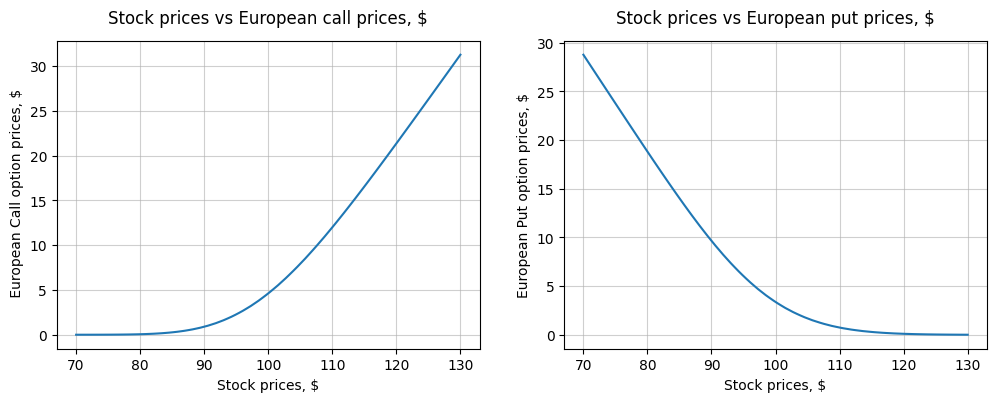

In [ ]:
stock_prices = list(np.linspace(70, 130, 100))
call_prices_arr = [TrinomialCall(price, 0.05, 0.2, 1/4, 100.0).price(100) for price in stock_prices]
put_prices_arr = [TrinomialPut(price, 0.05, 0.2, 1/4, 100.0).price(100) for price in stock_prices]

fig, axes = plt.subplots(1,2, figsize = (12,4))

axes[0].plot(stock_prices, call_prices_arr)
axes[0].set_title("Stock prices vs European call prices, $", y = 1.03)
axes[0].set_xlabel("Stock prices, $")
axes[0].set_ylabel(" European Call option prices, $")
axes[0].grid(alpha=0.6, ls="-")

axes[1].plot(stock_prices, put_prices_arr)
axes[1].set_title("Stock prices vs European put prices, $", y = 1.03)
axes[1].set_xlabel("Stock prices, $")
axes[1].set_ylabel("European Put option prices, $")
axes[1].grid(alpha=0.6, ls="-")
plt.show()

##### *20.Graph #2. Graph American call prices and put prices versus stock prices.*

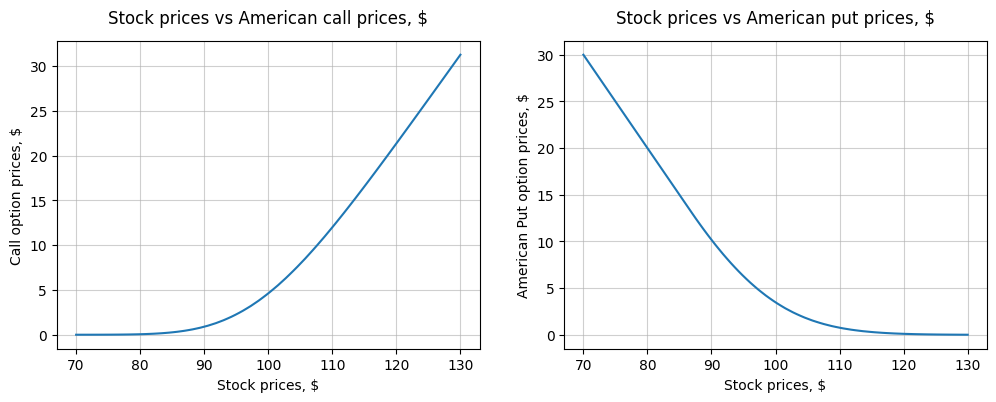

In [ ]:
amer_call_prices_arr = [AmericanTrinomialCall(price, 0.05, 0.2, 1/4, 100).price(100) for price in list(np.linspace(70, 130, 100))]
amer_put_prices_arr = [AmericanTrinomialPut(price, 0.05, 0.2, 1/4, 100).price(100) for price in list(np.linspace(70, 130, 100))]

fig, axes = plt.subplots(1,2, figsize = (12,4))

axes[0].plot(stock_prices, amer_call_prices_arr)
axes[0].set_title("Stock prices vs American call prices, $", y = 1.03)
axes[0].set_xlabel("Stock prices, $")
axes[0].set_ylabel("Call option prices, $")
axes[0].grid(alpha=0.6, ls="-")

axes[1].plot(stock_prices, amer_put_prices_arr)
axes[1].set_title("Stock prices vs American put prices, $", y = 1.03)
axes[1].set_xlabel("Stock prices, $")
axes[1].set_ylabel("American Put option prices, $")
axes[1].grid(alpha=0.6, ls="-")
plt.show()

##### *21.Graph #3. Graph European and American call prices versus strike.*

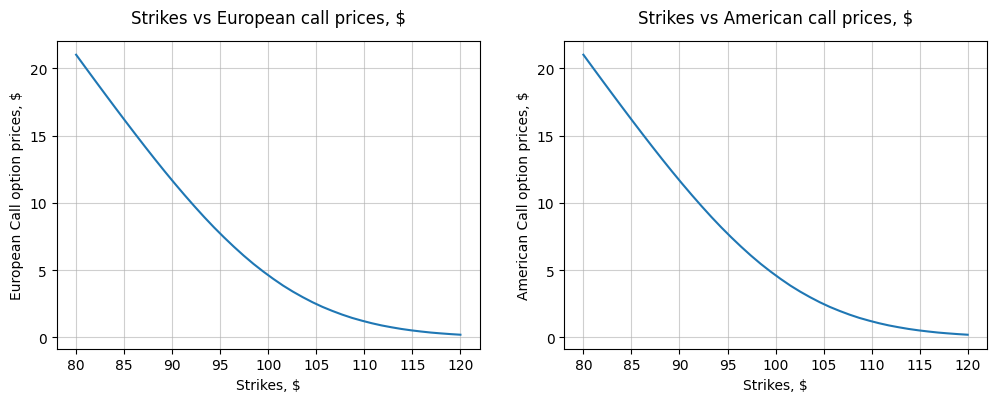

In [ ]:
strikes = list(np.linspace(80, 120, 40))

euro_call_option_prices = [TrinomialCall(100, 0.05, 0.2, 1/4, strike).price(100) for strike in strikes]
amer_call_option_prices = [AmericanTrinomialCall(100, 0.05, 0.2, 1/4, strike).price(100) for strike in strikes]

# Plotting graphs
fig, axes = plt.subplots(1,2, figsize = (12,4))

axes[0].plot(strikes, euro_call_option_prices)
axes[0].set_title("Strikes vs European call prices, $", y = 1.03)
axes[0].set_xlabel("Strikes, $")
axes[0].set_ylabel("European Call option prices, $")
axes[0].grid(alpha=0.6, ls="-")

axes[1].plot(strikes, amer_call_option_prices)
axes[1].set_title("Strikes vs American call prices, $", y = 1.03)
axes[1].set_xlabel("Strikes, $")
axes[1].set_ylabel("American Call option prices, $")
axes[1].grid(alpha=0.6, ls="-")
plt.show()

##### *22.Graph #4. Graph European and American put prices versus strike.*

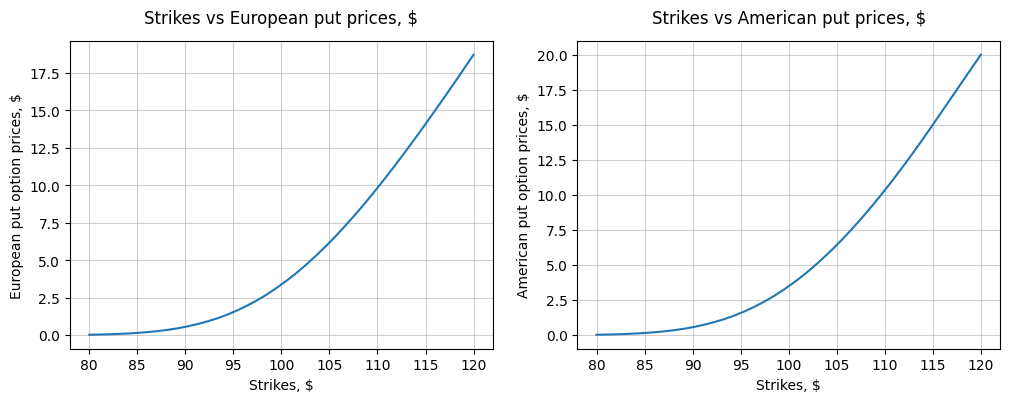

In [ ]:
strikes = list(np.linspace(80, 120, 40))
euro_put_option_prices = [TrinomialPut(100, 0.05, 0.2, 1/4, strike).price(100) for strike in strikes]
amer_put_option_prices = [AmericanTrinomialPut(100, 0.05, 0.2, 1/4, strike).price(100) for strike in strikes]

# Plotting graphs
fig, axes = plt.subplots(1,2, figsize = (12,4))

axes[0].plot(strikes, euro_put_option_prices)
axes[0].set_title("Strikes vs European put prices, $", y = 1.03)
axes[0].set_xlabel("Strikes, $")
axes[0].set_ylabel("European put option prices, $")
axes[0].grid(alpha=0.6, ls="-")

axes[1].plot(strikes, amer_put_option_prices)
axes[1].set_title("Strikes vs American put prices, $", y = 1.03)
axes[1].set_xlabel("Strikes, $")
axes[1].set_ylabel("American put option prices, $")
axes[1].grid(alpha=0.6, ls="-")
plt.show()

##### *23. Checking for put-call parity for European options*

In [ ]:
#Checking Put-Call Parity for European Options
for i in range(len(K_array)):
  print("Put-Call Parity for European options at Call Price ${0}, Put Price ${1} and Strike(K) at ${2}:".format(np.round(call_price_arr[i],2), np.round(put_price_arr[i],2), K_array[i]))
  print(f"Left-hand side: {np.round(call_price_arr[i] + K_array[i] * np.exp(-0.05 * 1/4), 2)}, right-hand side: {round(100 + put_price_arr[i], 2)}, difference = {round(round(100 + put_price_arr[i], 2) - np.round(call_price_arr[i] + K_array[i] * np.exp(-0.05 * 1/4), 2),2)}")
  print(round(call_price_arr[i] + K_array[i] * np.exp(-0.05 * 1/4), 2) == round(100 + put_price_arr[i], 2), "\n")

Put-Call Parity for European options at Call Price $11.67, Put Price $0.55 and Strike(K) at $90:
Left-hand side: 100.55, right-hand side: 100.55, difference = 0.0
True 

Put-Call Parity for European options at Call Price $7.72, Put Price $1.54 and Strike(K) at $95:
Left-hand side: 101.54, right-hand side: 101.54, difference = 0.0
True 

Put-Call Parity for European options at Call Price $4.61, Put Price $3.37 and Strike(K) at $100:
Left-hand side: 103.37, right-hand side: 103.37, difference = 0.0
True 

Put-Call Parity for European options at Call Price $2.48, Put Price $6.18 and Strike(K) at $105:
Left-hand side: 106.18, right-hand side: 106.18, difference = 0.0
True 

Put-Call Parity for European options at Call Price $1.19, Put Price $9.83 and Strike(K) at $110:
Left-hand side: 109.83, right-hand side: 109.83, difference = 0.0
True 



##### *24. Checking for put-call parity for American options*

In [ ]:
#Checking Put-Call Parity for American Options
for i in range(len(K_array)):
  print("Put-Call Parity for American options at Call Price ${0}, Put Price ${1} and Strike(K) at ${2} holds".format(np.round(amer_call_price_arr[i],2), np.round(amer_put_price_arr[i],2), K_array[i]))
  print(f"Left-hand side: {np.round(call_price_arr[i] + K_array[i] * np.exp(-0.05 * 1/4), 2)}, right-hand side: {round(100 + put_price_arr[i], 2)}, difference = {np.round(round(100 + put_price_arr[i], 2) - round(call_price_arr[i] + K_array[i] * np.exp(-0.05 * 1/4), 2),2)}")
  # print(round(amer_call_price_arr[i] + K_array[i] * np.exp(-0.05 * 1/4), 1) == round(100 + amer_put_price_arr[i],2), "\n")

Put-Call Parity for American options at Call Price $11.68, Put Price $0.56 and Strike(K) at $90 holds
Left-hand side: 100.55, right-hand side: 100.55, difference = 0.0
Put-Call Parity for American options at Call Price $7.83, Put Price $1.67 and Strike(K) at $95 holds
Left-hand side: 101.54, right-hand side: 101.54, difference = 0.0
Put-Call Parity for American options at Call Price $4.45, Put Price $3.33 and Strike(K) at $100 holds
Left-hand side: 103.37, right-hand side: 103.37, difference = 0.0
Put-Call Parity for American options at Call Price $2.61, Put Price $6.5 and Strike(K) at $105 holds
Left-hand side: 106.18, right-hand side: 106.18, difference = 0.0
Put-Call Parity for American options at Call Price $1.14, Put Price $10.2 and Strike(K) at $110 holds
Left-hand side: 109.83, right-hand side: 109.83, difference = 0.0


# **Step 3**

25.Dynamic Delta Hedging. See google doc.

##### *26.Using the same data from Q25, price an American Put option.*

In [ ]:
S_ini = 180
K = 182
T = 1/2
r = 0.02
sigma = 0.25
N = 25

In [ ]:
C0, C, S, Delta = american_option(S_ini=S_ini, K=K, T=T, r=r, sigma=sigma, N=N, opttype='put')

In [ ]:
path = 'udddududududdddudududuudd'


stock_prices = [S_ini]
put_prices = [C[0][0]]
deltas = [Delta[0][0]]
portfolio_values = [S_ini * Delta[0][0]]
cash_accounts = [-S_ini * Delta[0][0]]

j = 0
for i, ud in enumerate(path, 1):
    if ud == 'u': j += 1

    stock_price = S[i][j]
    put_price = C[i][j]

    if i != 25:
      delta = Delta[i][j]
      cash_account = (deltas[-1] - delta) * stock_price
      portfolio_value = portfolio_values[-1] - cash_account
    else:
      delta = 0
      portfolio_value = deltas[-1] * stock_price
      cash_account = portfolio_value - put_price


    stock_prices.append(stock_price)
    put_prices.append(put_price)
    deltas.append(delta)
    portfolio_values.append(portfolio_value)
    cash_accounts.append(cash_account)

In [ ]:
df = pd.DataFrame([stock_prices, put_prices, deltas, portfolio_values, cash_accounts], index=['Stock Price', 'Put Price', 'Delta', 'Portfolio Value', 'Cash Account'])
df.columns = [f't={i}' for i in df.columns]
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
df['Total'] = ['', '', '', '', df.iloc[-1].sum()]
df

,t=0,t=1,t=2,t=3,t=4,t=5,t=6,t=7,t=8,t=9,t=10,t=11,t=12,t=13,t=14,t=15,t=16,t=17,t=18,t=19,t=20,t=21,t=22,t=23,t=24,t=25,Total
Stock Price,180.00,186.48,180.00,173.75,167.71,173.75,167.71,173.75,167.71,173.75,167.71,173.75,167.71,161.89,156.26,150.83,156.26,150.83,156.26,150.83,156.26,150.83,156.26,161.89,156.26,150.83,
Put Price,13.04,9.99,12.59,15.62,19.09,15.17,18.69,14.70,18.26,14.20,17.82,13.66,17.36,21.58,26.25,31.24,26.04,31.17,25.87,31.17,25.74,31.17,25.74,20.11,25.74,31.17,
Delta,-0.48,-0.40,-0.48,-0.57,-0.66,-0.57,-0.67,-0.58,-0.68,-0.59,-0.70,-0.60,-0.72,-0.82,-0.91,-0.97,-0.93,-0.99,-0.96,-1.00,-0.99,-1.00,-1.00,-1.00,-1.00,0.00,
Portfolio Value,-85.60,-70.60,-85.63,-101.08,-116.29,-101.82,-117.71,-102.72,-119.39,-103.80,-121.40,-105.13,-123.81,-140.59,-154.23,-164.04,-157.80,-166.23,-162.34,-167.95,-166.02,-167.88,-167.88,-167.88,-167.88,-150.83,
Cash Account,85.60,-15.00,15.03,15.45,15.21,-14.46,15.89,-15.00,16.67,-15.58,17.59,-16.27,18.68,16.78,13.64,9.80,-6.24,8.43,-3.89,5.61,-1.93,1.86,0.00,0.00,0.00,-182.00,-14.12


#### **Asian Put Option**

In [ ]:
def asian_option_mc(S_ini, K, T, r, sigma, N, M):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    Asian = np.zeros([M])  # Asian prices
    S = np.zeros([M, N + 1])  # underlying price
    S_1 = np.zeros([M, N+1]) #underlying price for second path
    S[:, 0] = S_ini
    Delta = np.zeros([M, N])  # delta
    P = np.zeros([M, N+1]) #put prices
    path = []

    for j in range(0, M):
        random = np.random.binomial(1, p, N + 1)
        Total = S_ini
        pathway = ""
        for i in range(1, N + 1):
            if random[i] == 1:
                S[j, i] = S[j, i - 1] * u
                Total = Total + S[j, i]
                pathway += "u"

            else:
                S[j, i] = S[j, i - 1] * d
                Total = Total + S[j, i]
                pathway += "d"
            P[j, i] = np.exp(-r * T) * (p * max(K-S[j,i], 0) + (1 - p) * max(K-S[j,i-1],0) ) #max(K - S[j,i], 0)
            Delta[j, i-1] = (P[j, i]-P[j, i-1])/ (S[j, i]-S[j,i-1])

        path.append(pathway)
        Asian[j] = np.exp(-r * T) * max(K - Total / (N + 1), 0)

    return path, S, Asian, Delta,P

In [ ]:
path, S, Asian, Delta, put_price = asian_option_mc(180, 180, 1/2, 0.02, 0.25, 25, 1000)

In [ ]:
print("Following the path {}".format(path[0]))
print("Asian Put Price: ${:.2f}".format(np.mean(Asian)))
print("Stock Prices", np.round(S[0],2))
print("Put prices throughout the path", np.round(put_price[0],2))
print("Delta", np.round(Delta[0],2))

Following the path uudddudududdduuduudududud
Asian Put Price: $6.39
Stock Prices [180.   186.48 193.19 186.48 180.   173.75 180.   173.75 180.   173.75
 180.   173.75 167.71 161.89 167.71 173.75 167.71 173.75 180.   173.75
 180.   173.75 180.   173.75 180.   173.75]
Put prices throughout the path [ 0.    0.    0.    0.    0.    3.08  3.11  3.08  3.11  3.08  3.11  3.08
  9.16 15.03 15.07  9.2   9.16  9.2   3.11  3.08  3.11  3.08  3.11  3.08
  3.11  3.08]
Delta [ 0.    0.   -0.   -0.   -0.49  0.01  0.01  0.01  0.01  0.01  0.01 -1.01
 -1.01  0.01 -0.97  0.01  0.01 -0.97  0.01  0.01  0.01  0.01  0.01  0.01
  0.01]
